## ---------------Start of Final Project of Data Science/9 Dec 2016------------------------
<li><strong>Title:</strong>CS570 Final Project of Data Science
<li>Final Project of Data Science(Allstate Claims Severity Kaggle Compitition)
<li><strong>Name:</strong>RAJESH ASHOK JAISWAL UIN:669012329
<li><strong>DATED:</strong>12/10/2016

## --------------------------------About Challenge-----------------------------------------
<li>When you’ve been devastated by a serious car accident, your focus is on the things that matter the most: family, friends, and other loved ones. Pushing paper with your insurance agent is the last place you want your time or mental energy spent. This is why Allstate, a personal insurer in the United States, is continually seeking fresh ideas to improve their claims service for the over 16 million households they protect.

<li>Allstate is currently developing automated methods of predicting the cost, and hence severity, of claims. In this recruitment challenge, Kagglers are invited to show off their creativity and flex their technical chops by creating an algorithm which accurately predicts claims severity. 

#### ---------------------------------------Data loading and Creation of Local DataFrame---------------------------------------
<li> Will create Local Dataframe 'TRdata' for train dataset having 187000 rows
<li> Then load data from 'train.csv to 'TRdata'

In [31]:
#Here will import required pandas api or function
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
#Creation of 'TRdata' dataframe for Train data
TRdata = pd.read_csv("train.csv")

In [33]:
#Display TRdata frame only 1st 5 entries 
TRdata.head(5)

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9   ...        cont6  \
0   1    A    B    A    B    A    A    A    A    B   ...     0.718367   
1   2    A    B    A    A    A    A    A    A    B   ...     0.438917   
2   5    A    B    A    A    B    A    A    A    B   ...     0.289648   
3  10    B    B    A    B    A    A    A    A    B   ...     0.440945   
4  11    A    B    A    B    A    A    A    A    B   ...     0.178193   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
0  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493   
1  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431   
2  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709   
3  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077   
4  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011   

     cont14     loss  
0  0.714843  2213.18  
1  0.304496  1283.60  
2  0.774425  3005.09  
3  0.602642   939.85  
4  0.432606  2763.85  

[5 rows x 132 columns]

## ---------------------------Missing Value Handling---------------------------
<li> In this step we first check is there any missing value presnt into it or not.
<li> If their any Missing Value we will handle it by 
<pre>  
    <strong>1)Average (Mean) value replacement(If column is of Continous Type).<strong>
    <strong>2)Frequent Categorial Value replacement(If column is of Categorial Type.<strong>
<pre>        
    

In [34]:
## This loop will search each column of dataframe 'TRdata' 
##and will return column name which have missing value. 
[col for col in TRdata.columns 
     if TRdata[col].isnull().any()]

[]

### Conclusion on Missing Value:
<strong>Above output of given loop reflect that the DataFrame don't have any missing values<strong>

In [35]:
## This function will remove all spaces from the column entries 
def df_strip(TRdata):
    TRdata = TRdata.copy()
    for c in TRdata.columns:
        if TRdata[c].dtype == np.object:
            TRdata[c] = pd.core.strings.str_strip(TRdata[c])
        TRdata = TRdata.rename(columns={c:c.strip()})
    return Rdata

## ------------------------EDA of Given Train Dataset------------------------
In this section I am going to handle below pointers:
<li>Details About Train Data.
<li>Column types (Continous or Categorial).
<li> Histogram and Descriptive statistics according to column type.

In [6]:
# I this section will provide more details about train data.
TRdata.shape

(188318, 132)

<li><strong> Train Data hold 188318 number of rows and 132 columns<strong> 
<li><strong> Out of 132 columns one is 'id' column and 'loss' is a prediction column<strong>
<li><strong> So we have 14 continous value columns and 116 categorial value columns. 

## Continous Columns:14

In [7]:
##In this section we are going to do statistical analysis of Continous values which will return 
##Count of entries
##Mean value of continous column
##Standard Deviation of continous columns
##Min and MAx values
TRdata.describe()

id          cont1          cont2          cont3  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean   294135.982561       0.493861       0.507188       0.498918   
std    169336.084867       0.187640       0.207202       0.202105   
min         1.000000       0.000016       0.001149       0.002634   
25%    147748.250000       0.346090       0.358319       0.336963   
50%    294539.500000       0.475784       0.555782       0.527991   
75%    440680.500000       0.623912       0.681761       0.634224   
max    587633.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.491812       0.487428       0.490945       0.484970   
std         0.211292       0.209027       0.205273       0.178450   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.281143       0.336105       0.350175   
50%         0.452887       0.422268       0.440945       0.438285   
75%         0.652072       0.643315       0.655021       0.591045   
max         0.954297       0.983674       0.997162       1.000000   

               cont8          cont9         cont10         cont11  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.486437       0.485506       0.498066       0.493511   
std         0.199370       0.181660       0.185877       0.209737   
min         0.236880       0.000080       0.000000       0.035321   
25%         0.312800       0.358970       0.364580       0.310961   
50%         0.441060       0.441450       0.461190       0.457203   
75%         0.623580       0.566820       0.614590       0.678924   
max         0.980200       0.995400       0.994980       0.998742   

              cont12         cont13         cont14           loss  
count  188318.000000  188318.000000  188318.000000  188318.000000  
mean        0.493150       0.493138       0.495717    3037.337686  
std         0.209427       0.212777       0.222488    2904.086186  
min         0.036232       0.000228       0.179722       0.670000  
25%         0.311661       0.315758       0.294610    1204.460000  
50%         0.462286       0.363547       0.407403    2115.570000  
75%         0.675759       0.689974       0.724623    3864.045000  
max         0.998484       0.988494       0.844848  121012.250000

### Above output say that train data have total 16 continous columns out of which one is 'id' and one is 'loss' column of predicted value.

In [8]:
##In this section I am going to display categorial columns using a below mentioned function:
def describe_categorical(TRdata):
    from IPython.display import display, HTML
    display(HTML(TRdata[TRdata.columns[TRdata.dtypes == "object"]].describe().to_html()))

## Categorial Columns 116

In [9]:
describe_categorical(TRdata)

### Above output say that train data have total 116 categorial columns.

#### ---------------------------Histogram------------------------------------------
<li> I am plotting only few histogram for few columns as this dataframe have 132 columns.

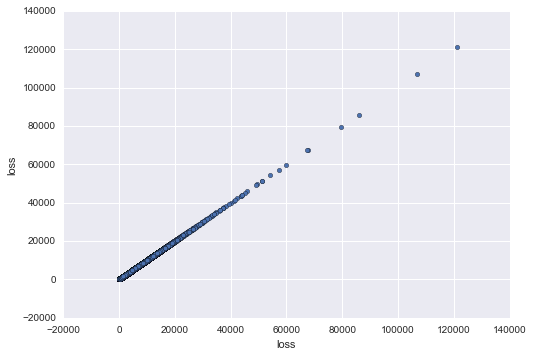

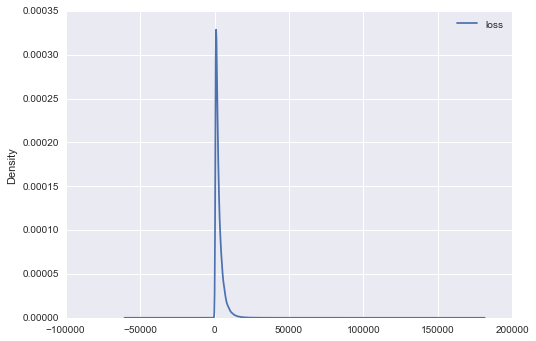

In [10]:
from string import letters
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
TRdata.head()
TRdata.plot(kind='scatter',x='loss',y='loss')
TRdata.plot(kind='kde',y='loss')


#### Above plotting will show the loss column distribution

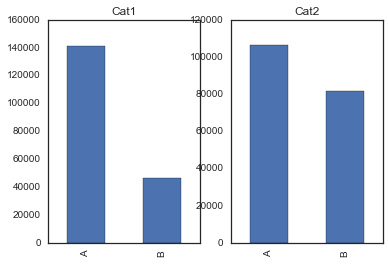

In [12]:
fig, axs = plt.subplots(1,2)
TRdata['cat1'].value_counts().plot(kind='bar',ax=axs[0],title="Cat1")
TRdata['cat2'].value_counts().plot(kind='bar',ax=axs[1],title="Cat2")

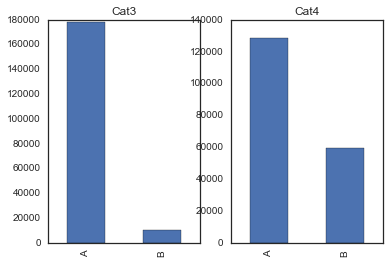

In [13]:
fig, axs = plt.subplots(1,2)
TRdata['cat3'].value_counts().plot(kind='bar',ax=axs[0],title="Cat3")
TRdata['cat4'].value_counts().plot(kind='bar',ax=axs[1],title="Cat4")

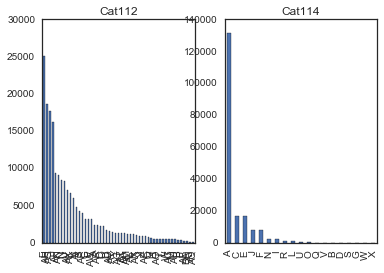

In [14]:
fig, axs = plt.subplots(1,2)
TRdata['cat112'].value_counts().plot(kind='bar',ax=axs[0],title="Cat112")
TRdata['cat114'].value_counts().plot(kind='bar',ax=axs[1],title="Cat114")

### -----------------------------Building of different classification model---------------------------
<li> Will check <strong>Linear Regression</strong> on TRdata(train data)
<li> Will check <strong>Decision Tree</strong> on TRdata(train data)
<li> Then generate <strong>Random Forest </strong> for Final project

### --------------------------Spliting Traindata into X,Y---------------------
##Lets split Train dataset "TRdata' into X,Y as we are predicting 'y' column value 
##for this midterm will keep it in 'Ytrain'
##And remaining Data into 'Xtrain'

In [11]:
#Here we are going to separate 'y' column from Tdata
Ytrain=TRdata.pop("loss")

In [12]:
#Here I am going to store remaining tdata into 'Xtrain'
Xtrain=TRdata

In [13]:
Xtrain.head(5)

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9    ...        cont5  \
0   1    A    B    A    B    A    A    A    A    B    ...     0.310061   
1   2    A    B    A    A    A    A    A    A    B    ...     0.885834   
2   5    A    B    A    A    B    A    A    A    B    ...     0.397069   
3  10    B    B    A    B    A    A    A    A    B    ...     0.422268   
4  11    A    B    A    B    A    A    A    A    B    ...     0.704268   

      cont6     cont7    cont8    cont9   cont10    cont11    cont12  \
0  0.718367  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646   
1  0.438917  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307   
2  0.289648  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424   
3  0.440945  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570   
4  0.178193  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213   

     cont13    cont14  
0  0.822493  0.714843  
1  0.611431  0.304496  
2  0.195709  0.774425  
3  0.605077  0.602642  
4  0.246011  0.432606  

[5 rows x 131 columns]

## ---------------------------Prepareing Data For Algorithm Implementation---------------------
<li> Our prediction column'loss' have continous value in it so to implement algorithm need to do follow things.
<li> Creation of dummies for categorial column.
<li> Then impletemnation of Regressor kind Algorithm.
<li> Drop non-required columns.
<li> Predict accuracy


In [14]:
#Here I am going to create new DataFrame for Model Building only for required columns.
## Creating new dataframe with name=Cdata
Cdata=pd.DataFrame()
Cdata['cat1']=Xtrain['cat1']
Cdata['cat2']=Xtrain['cat2']
Cdata['cat3']=Xtrain['cat3']
Cdata['cat4']=Xtrain['cat4']
Cdata['cat5']=Xtrain['cat5']
Cdata['cat6']=Xtrain['cat6']
Cdata['cat7']=Xtrain['cat7']
Cdata['cat8']=Xtrain['cat8']
Cdata['cat9']=Xtrain['cat9']
Cdata['cat10']=Xtrain['cat10']
Cdata['cat11']=Xtrain['cat11']
Cdata['cat12']=Xtrain['cat12']
Cdata['cat13']=Xtrain['cat13']
Cdata['cat14']=Xtrain['cat14']
Cdata['cat15']=Xtrain['cat15']
Cdata['cat16']=Xtrain['cat16']
Cdata['cat17']=Xtrain['cat17']
Cdata['cat18']=Xtrain['cat18']
Cdata['cat19']=Xtrain['cat19']
Cdata['cat20']=Xtrain['cat20']
Cdata['cat21']=Xtrain['cat21']
Cdata['cat22']=Xtrain['cat22']
Cdata['cat23']=Xtrain['cat23']
Cdata['cat24']=Xtrain['cat24']
Cdata['cat25']=Xtrain['cat25']
Cdata['cat26']=Xtrain['cat26']
Cdata['cat27']=Xtrain['cat27']
Cdata['cat28']=Xtrain['cat28']
Cdata['cat29']=Xtrain['cat29']
Cdata['cat30']=Xtrain['cat30']
Cdata['cat31']=Xtrain['cat31']
Cdata['cat32']=Xtrain['cat32']
Cdata['cat33']=Xtrain['cat33']
Cdata['cat34']=Xtrain['cat34']
Cdata['cat35']=Xtrain['cat35']
Cdata['cat36']=Xtrain['cat36']
Cdata['cat37']=Xtrain['cat37']
Cdata['cat38']=Xtrain['cat38']
Cdata['cat39']=Xtrain['cat39']
Cdata['cat40']=Xtrain['cat40']
Cdata['cat41']=Xtrain['cat41']
Cdata['cat42']=Xtrain['cat42']
Cdata['cat43']=Xtrain['cat43']
Cdata['cat44']=Xtrain['cat44']
Cdata['cat45']=Xtrain['cat45']
Cdata['cat46']=Xtrain['cat46']
Cdata['cat47']=Xtrain['cat47']
Cdata['cat48']=Xtrain['cat48']
Cdata['cat49']=Xtrain['cat49']
Cdata['cat50']=Xtrain['cat50']
Cdata['cat51']=Xtrain['cat51']
Cdata['cat52']=Xtrain['cat52']
Cdata['cat53']=Xtrain['cat53']
Cdata['cat54']=Xtrain['cat54']
Cdata['cat55']=Xtrain['cat55']
Cdata['cat56']=Xtrain['cat56']
Cdata['cat57']=Xtrain['cat57']
Cdata['cat58']=Xtrain['cat58']
Cdata['cat59']=Xtrain['cat59']
Cdata['cat60']=Xtrain['cat60']
Cdata['cat61']=Xtrain['cat61']
Cdata['cat62']=Xtrain['cat62']
Cdata['cat63']=Xtrain['cat63']
Cdata['cat64']=Xtrain['cat64']
Cdata['cat65']=Xtrain['cat65']
Cdata['cat66']=Xtrain['cat66']
Cdata['cat67']=Xtrain['cat67']
Cdata['cat68']=Xtrain['cat68']
Cdata['cat69']=Xtrain['cat69']
Cdata['cat70']=Xtrain['cat70']
Cdata['cat71']=Xtrain['cat71']
Cdata['cat72']=Xtrain['cat72']
Cdata['cat73']=Xtrain['cat73']
Cdata['cat74']=Xtrain['cat74']
Cdata['cat75']=Xtrain['cat75']
Cdata['cat76']=Xtrain['cat76']
Cdata['cat77']=Xtrain['cat77']
Cdata['cat78']=Xtrain['cat78']
Cdata['cat79']=Xtrain['cat79']
Cdata['cat80']=Xtrain['cat80']
Cdata['cat81']=Xtrain['cat81']
Cdata['cat82']=Xtrain['cat82']
Cdata['cat83']=Xtrain['cat83']
Cdata['cat84']=Xtrain['cat84']
Cdata['cat85']=Xtrain['cat85']
Cdata['cat86']=Xtrain['cat86']
Cdata['cat87']=Xtrain['cat87']
Cdata['cat88']=Xtrain['cat88']
Cdata['cont1']=Xtrain['cont1']
Cdata['cont2']=Xtrain['cont2']
Cdata['cont3']=Xtrain['cont3']
Cdata['cont4']=Xtrain['cont4']
Cdata['cont5']=Xtrain['cont5']
Cdata['cont6']=Xtrain['cont6']
Cdata['cont7']=Xtrain['cont7']
Cdata['cont8']=Xtrain['cont8']
Cdata['cont9']=Xtrain['cont9']
Cdata['cont10']=Xtrain['cont10']
Cdata['cont11']=Xtrain['cont11']
Cdata['cont12']=Xtrain['cont12']
Cdata['cont13']=Xtrain['cont13']
Cdata['cont14']=Xtrain['cont14']

In [15]:
Variable_Cat=['cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9','cat10',
              'cat11','cat12','cat13','cat14','cat15','cat16','cat17','cat18','cat19','cat20',
              'cat21','cat22','cat23','cat24','cat25','cat26','cat27','cat28','cat29','cat30',
              'cat31','cat32','cat33','cat34','cat35','cat36','cat37','cat38','cat39','cat40',
              'cat41','cat42','cat43','cat44','cat45','cat46','cat47','cat48','cat49','cat50',
              'cat51','cat52','cat53','cat54','cat55','cat56','cat57','cat58','cat59','cat60',
              'cat61','cat62','cat63','cat64','cat65','cat66','cat67','cat68','cat69','cat70',
              'cat71','cat72','cat73','cat74','cat75','cat76','cat77','cat78','cat79','cat80',
              'cat81','cat82','cat83','cat84','cat85','cat86','cat87','cat88']

In [16]:
## This function will pick categorial column and create dummies
for variable in Variable_Cat:
    # Create array of dummies
    dummies = pd.get_dummies(Cdata[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    Cdata = pd.concat([Cdata, dummies], axis=1)
    Cdata.drop([variable], axis=1, inplace=True)

In [ ]:
Cdata

## ----------------------- Application of Graph Theory on Train Data------------------------------
<li> Will Plot Graph
<li> Top 10 Column Names which have highest impact point
<li> top 10 Column Names which have lowest impact.

In [22]:
Cdata.shape

(188318, 218)

In [23]:
#Transpose of given DataFrame
Cdata_Tr = Cdata.T

In [24]:
#Display Transpose matirx
Cdata_Tr.head(5)

0         1         2         3         4         5         6       \
cont1  0.726300  0.330514  0.261841  0.321594  0.273204  0.546670  0.471447   
cont2  0.245921  0.737068  0.358319  0.555782  0.159990  0.681761  0.737068   
cont3  0.187583  0.592681  0.484196  0.527991  0.527991  0.634224  0.613660   
cont4  0.789639  0.614134  0.236924  0.373816  0.473202  0.373816  0.189137   
cont5  0.310061  0.885834  0.397069  0.422268  0.704268  0.302678  0.295397   

         7         8         9         ...       188308    188309    188310  \
cont1  0.826591  0.330514  0.726300    ...     0.325401  0.306603  0.289618   
cont2  0.488789  0.555782  0.358319    ...     0.555782  0.299102  0.358319   
cont3  0.263570  0.440642  0.356819    ...     0.549770  0.356819  0.506105   
cont4  0.623770  0.473202  0.802892    ...     0.473202  0.327354  0.354893   
cont5  0.473767  0.281143  0.310061    ...     0.758711  0.397069  0.302678   

         188311    188312    188313    188314    188315    188316    188317  
cont1  0.585115  0.228606  0.347403  0.507661  0.484469  0.438385  0.907272  
cont2  0.488789  0.737068  0.785784  0.555782  0.785784  0.422197  0.620805  
cont3  0.549770  0.527991  0.613660  0.549770  0.792378  0.298977  0.440642  
cont4  0.604408  0.373816  0.473202  0.802892  0.189137  0.383428  0.821574  
cont5  0.281143  0.422268  0.939556  0.704268  0.482436  0.340543  0.281143  

[5 rows x 188318 columns]

In [25]:
Cdata_Tr.shape

(218, 188318)

In [26]:
Cdata_occurance =Cdata_Tr.dot(Cdata)

In [27]:
Cdata_occurance.shape

(218, 218)

In [28]:
Cdata_occurance.to_csv("Cdata_occurance.csv")

In [29]:
Cdata_occurance.head(5)

cont1         cont2         cont3         cont4         cont5  \
cont1  52561.003142  46546.370806  43219.840317  48484.203094  45145.881559   
cont2  46546.370806  56527.858707  51247.985562  47293.326249  48116.847077   
cont3  43219.840317  51247.985562  54568.092615  43461.064245  46507.790863   
cont4  48484.203094  47293.326249  43461.064245  53957.533048  46506.062939   
cont5  45145.881559  48116.847077  46507.790863  46506.062939  52969.667811   

              cont6         cont7         cont8         cont9        cont10  \
cont1  51159.730059  47420.287370  47784.483744  51122.745839  51632.261058   
cont2  47018.500694  46656.342038  47530.350827  46140.023777  48032.359207   
cont3  43398.079082  46227.838906  44296.318126  42732.418236  44492.776551   
cont4  47274.389458  44099.527624  49246.879653  47343.999247  48224.668771   
cont5  43853.994430  42764.614189  44721.515832  43934.602421  45242.824867   

         ...          cat86_C       cat86_D     cat87_A       cat87_B  \
cont1    ...      6460.749465  41598.904191  403.060010  83004.227463   
cont2    ...      4909.890547  36749.012154  383.393541  84621.920399   
cont3    ...      4284.579275  30308.825495  364.725775  83189.120508   
cont4    ...      5283.187983  37773.206648  393.626879  82180.939573   
cont5    ...      5705.266174  32626.167995  373.132589  81408.786404   

           cat87_C      cat87_D       cat88_A   cat88_B       cat88_D  \
cont1  4157.795249  5437.901730  77071.585875  4.499545  15859.844622   
cont2  4512.151934  5995.230985  86632.201280  2.830618   8843.676172   
cont3  4453.881822  5947.596698  88540.234417  1.926763   5390.685063   
cont4  4339.246191  5703.296556  80595.880243  3.566664  11967.342267   
cont5  4305.362165  5704.133871  83040.137853  2.776399   8709.303253   

         cat88_E  
cont1  67.054410  
cont2  33.988789  
cont3  22.478560  
cont4  50.320025  
cont5  39.197524  

[5 rows x 218 columns]

In [30]:
Cdata_occurance = pd.read_csv("Cdata_occurance.csv", index_col='Unnamed: 0')

In [31]:
#Plotting a Graph
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline

G = nx.from_numpy_matrix(Cdata_occurance.values)
G = nx.relabel_nodes(G, dict(enumerate(Cdata_occurance.columns)))

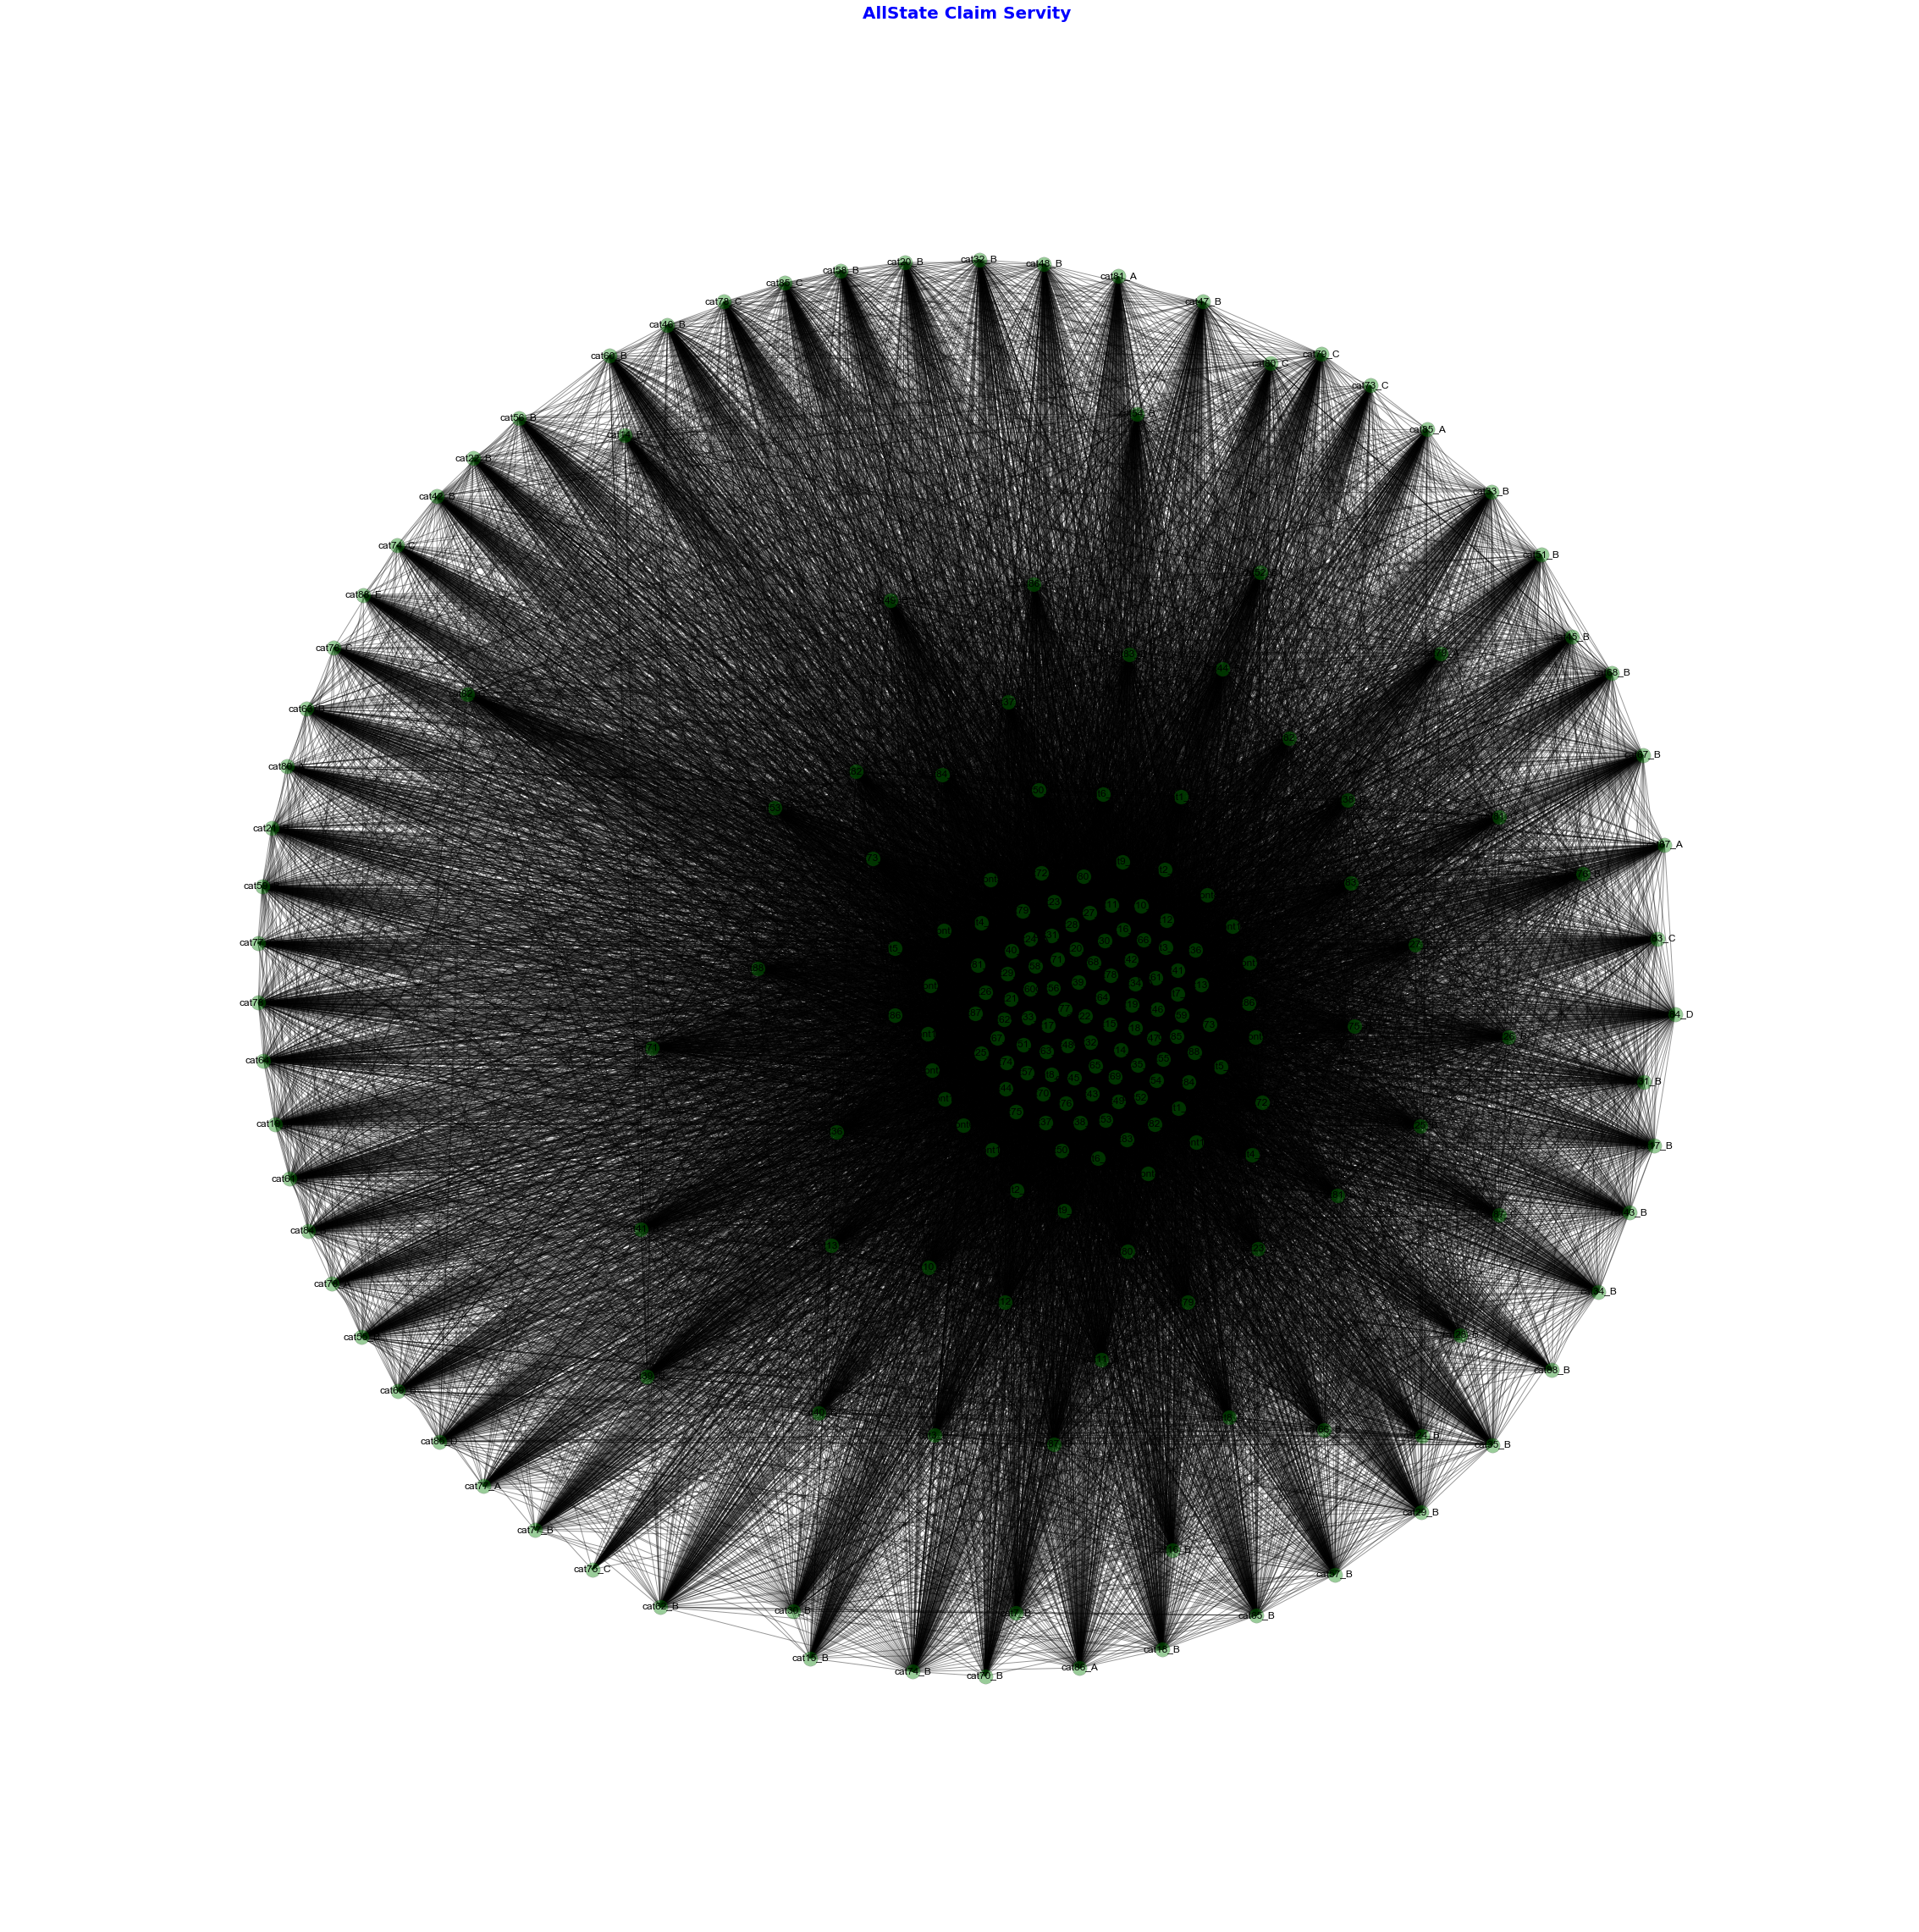

In [32]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=400, scale=6, k=6)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'b',
            'fontweight' : 'bold',
            'fontsize'   : 20}
plt.title("AllState Claim Servity", font)


nx.draw_networkx_nodes(G,pos,node_color='g',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [33]:
#This will provide the centrality of important columns
centrality= nx.eigenvector_centrality_numpy(G)

In [34]:
imp_cat = []
for node in centrality:
    imp_cat.append((node,centrality[node]))
    
sorted_imp_cat = imp_cat.sort(key=lambda x: x[1])

## top 10 Columns highest cetrality

In [35]:
top_10=sorted(imp_cat, key=lambda x: x[1], reverse=True)

In [36]:
top_10[:10]

[('cat70_A', 0.11174136303793465),
 ('cat15_A', 0.11173534514866075),
 ('cat22_A', 0.11173134727746992),
 ('cat62_A', 0.11173025089932122),
 ('cat64_A', 0.11172936855264093),
 ('cat63_A', 0.11171070162130188),
 ('cat68_A', 0.11167501704056632),
 ('cat55_A', 0.11167197866255262),
 ('cat56_A', 0.11165010601551029),
 ('cat20_A', 0.11164147424915742)]

## Lowest 10 Columns lowest cetrality

In [37]:
bottom_10=sorted(imp_cat, key=lambda x: x[1], reverse=False)

In [38]:
bottom_10[:10]

[('cat75_C', 5.555592391168615e-07),
 ('cat88_B', 4.039423205591297e-06),
 ('cat70_B', 1.3477277201550923e-05),
 ('cat74_C', 1.4970802323937686e-05),
 ('cat73_C', 1.4970802323942163e-05),
 ('cat15_B', 1.9495166475375696e-05),
 ('cat22_B', 2.349303766638763e-05),
 ('cat62_B', 2.458941581502083e-05),
 ('cat64_B', 2.547176249531638e-05),
 ('cat77_A', 2.7841055609020294e-05)]

### -------------------------------Splitting of Dataset in Train and Test----------------------------------

In [18]:
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(Cdata, Ytrain, test_size=.2)

## Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print "R^2:", model.score(X_test, y_test).round(2)

R^2: -4.05816156784e+18


## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
print "R^2:", model2.score(X_test, y_test).round(2)

R^2: 0.01


## Random Forest with defaults

In [42]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(random_state=42)
model3.fit(X_train, y_train)
print "R^2:", model3.score(X_test, y_test).round(2)

R^2: 0.48


In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Cdata)

In [45]:
def find_k (Cdata, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = Cdata.shape[0]
    sampleSize = Cdata.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(Cdata)[0])
        np.random.shuffle(index)
        Cdata =  Cdata[index, :]


    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(Cdata)
        mean_distortions.append(sum(np.min(pairwise_distances(Cdata, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / Cdata.shape[0])


    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

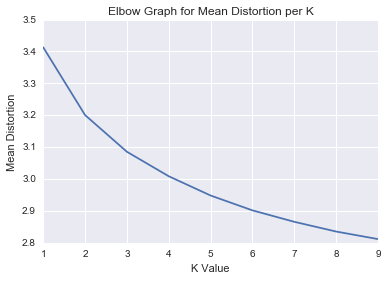

In [46]:
#Using Find function we are going to find proper nember of cluster
find_k(np.matrix(Cdata), range(1,10),1)

In [47]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

In [49]:
Cdata['Type'] = kmeans_model.labels_

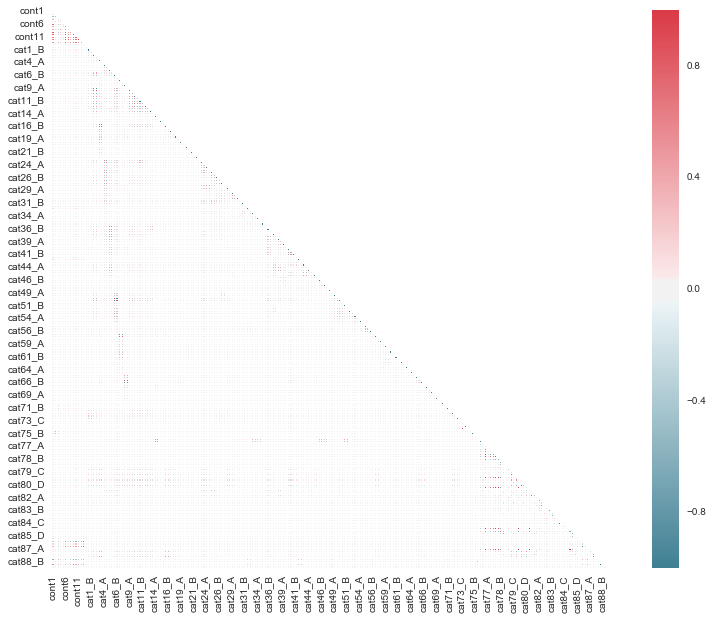

In [43]:
from string import letters
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white")

#Lets calculate the corelation matrix 
corr = Cdata.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,square=True, 
            xticklabels=5, yticklabels=5,linewidths=.5, 
            cbar_kws={"shrink": 1}, ax=ax)

## Building Our own The Random Forest Algorithm

Will Make change as they tune model for greater accuracy of prediction

## Most important parameters (and what they mean)
 * ### Parameters that will make your model better
  * <b>n_estimators</b>: The number of trees in the forest. Choose as high of a number as your computer can handle.
  * <b>max_features</b>: The number of features to consider when looking for the best split. Try ["auto", "None", "sqrt", "log2", 0.9, and 0.2]
  * <b>min_samples_leaf</b>: The minimum number of samples in newly created leaves.Try [1, 2, 3]. If 3 is the best, try higher numbers.
 * ### Parameters that will make it easier to train your model
  * <b>n_jobs</b>: Determines if multiple processors should be used to train and test the model. Always set this to -1 and %%timeit vs. if it is set to 1. It should be much faster (especially when many trees are trained).
  * <b>random_state</b>: Set this to 42 if you want to be cool AND want others to be able to replicate your results.
  * <b>oob_score</b>: THE BEST THING EVER. Random Forest's custom validation method: out-of-bag predictions.



In [20]:
from sklearn.ensemble import RandomForestRegressor
### Grid Search
n_estimators = [100,150]
max_features = ['auto', 'sqrt']
min_samples_split = [1,2]


rfc = RandomForestRegressor(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [21]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [1, 2], 'max_features': ['auto', 'sqrt'], 'n_estimators': [100, 150]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [23]:
estimator.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [24]:
best_rfc = estimator.best_estimator_

In [27]:
y_hatt = best_rfc.predict(X_test)

In [28]:
y_hatt

array([ 1321.0046    ,  2223.08273333,  1120.43786667, ...,  1630.28866667,
        1316.8136    ,  5212.35973333])

In [29]:
## for test dataset
correctt = 0
totalt = y_test.shape[0]
for pred_val, truth_val in zip(y_hatt, y_test):
    if pred_val == truth_val:
        correctt +=1

print correctt / float(totalt)

0.0


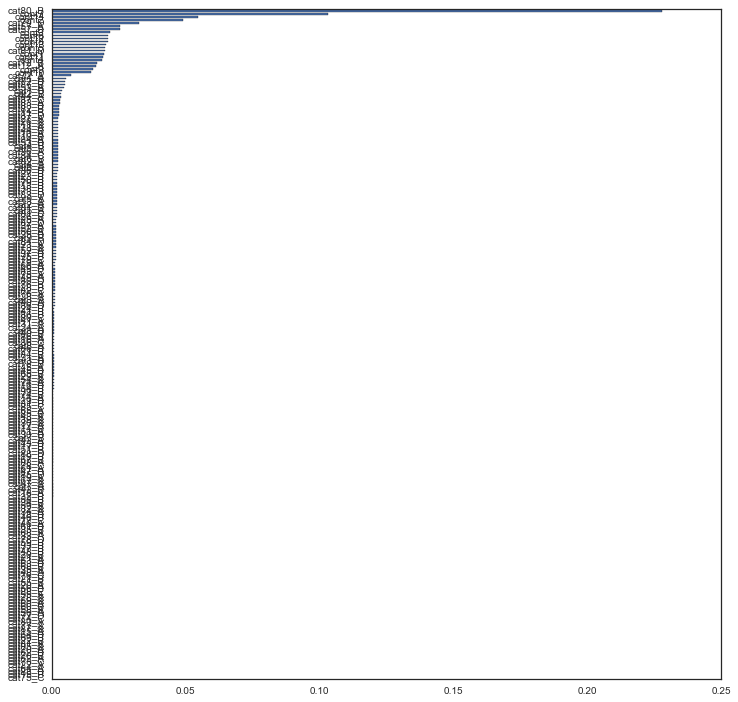

In [45]:
#This function will provide the order of important features.
feature_importances = pd.Series(model3.feature_importances_, index=Cdata.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(12,12));

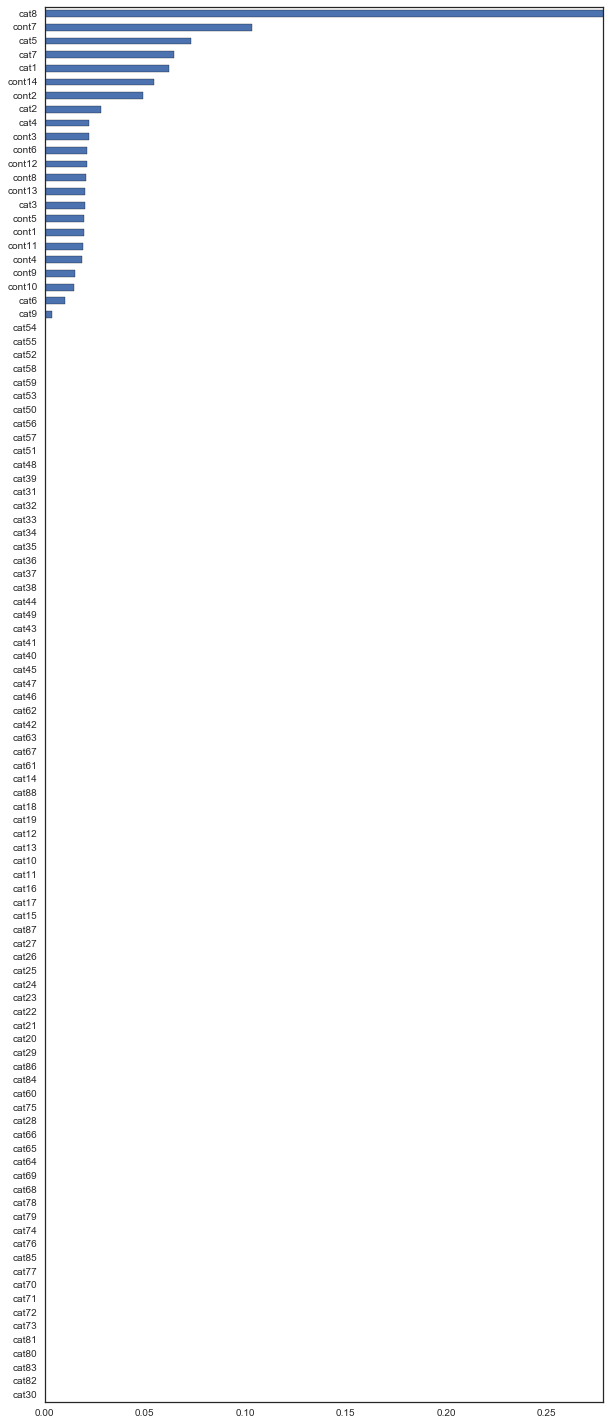

In [46]:
def graph_feature_importances(model3, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    
    if autoscale:
        x_scale = model3.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model3.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model3, Cdata.columns, summarized_columns=Variable_Cat)

## --------------------------------Inferences-------------------------------------------------
<li><strong>Machine Learning (supervised or unsupervised)</strong>
Given Data is an supervised data as training data set already have entries for loss column.
So while training module on a data this aready present value play very important role.
<li><strong>Statistical Inference:</strong>
We can draw below inferences from above data.
<li> Data is too huge and very complex so the accuracy of this model is 48%.
<li> We have name of top 10 columns which have highest impact on loss column
<li> Also have name of lowest 10 column with least impact on loss column.

## ------------------------------EDA on Test Dataset---------------------------------------
<li>will check type of columns(categorial or continous)
<li>Here will do EDA on all dataset except every column
<li>Will check missing values and handle them

In [36]:
#Here will import required pandas api or function
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [37]:
#Store Data into local Dataframe Tdata
Tdata = pd.read_csv("test.csv")

In [38]:
Tdata.head(5)

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9    ...        cont5  \
0   4    A    B    A    A    A    A    A    A    B    ...     0.281143   
1   6    A    B    A    B    A    A    A    A    B    ...     0.836443   
2   9    A    B    A    B    B    A    B    A    B    ...     0.718531   
3  12    A    A    A    A    B    A    A    A    A    ...     0.397069   
4  15    B    A    A    A    A    B    A    A    A    ...     0.302678   

      cont6     cont7    cont8    cont9   cont10    cont11    cont12  \
0  0.466591  0.317681  0.61229  0.34365  0.38016  0.377724  0.369858   
1  0.482425  0.443760  0.71330  0.51890  0.60401  0.689039  0.675759   
2  0.212308  0.325779  0.29758  0.34365  0.30529  0.245410  0.241676   
3  0.369930  0.342355  0.40028  0.33237  0.31480  0.348867  0.341872   
4  0.398862  0.391833  0.23688  0.43731  0.50556  0.359572  0.352251   

     cont13    cont14  
0  0.704052  0.392562  
1  0.453468  0.208045  
2  0.258586  0.297232  
3  0.592264  0.555955  
4  0.301535  0.825823  

[5 rows x 131 columns]

### -------------------will handle missing data of continous columns ---------------------------
Here I am going to replace each missing value of each column by its mean value

In [39]:
#here i going to check is there any continous column present in Tdata dataframe with missing values.
#will check is there any missing values
[col1 for col1 in Tdata.columns 
     if Tdata[col1].isnull().any()]

[]

### Conclusion on Missing Value:
<strong>Above output of given loop reflect that the DataFrame don't have any missing values<strong>

## ---------------------------Prepareing Data For Prediction---------------------
<li> Our prediction column'loss' have continous value in it so to implement algorithm need to do follow things.
<li> Creation of dummies for categorial column.
<li> Prediction
<li> Making Structure Same like Train Data
<li> Storing Result



In [40]:
#Storing required column Data into TCdata Frame
TCdata=pd.DataFrame()
TCdata['cat1']=Tdata['cat1']
TCdata['cat2']=Tdata['cat2']
TCdata['cat3']=Tdata['cat3']
TCdata['cat4']=Tdata['cat4']
TCdata['cat5']=Tdata['cat5']
TCdata['cat6']=Tdata['cat6']
TCdata['cat7']=Tdata['cat7']
TCdata['cat8']=Tdata['cat8']
TCdata['cat9']=Tdata['cat9']
TCdata['cat10']=Tdata['cat10']
TCdata['cat11']=Tdata['cat11']
TCdata['cat12']=Tdata['cat12']
TCdata['cat13']=Tdata['cat13']
TCdata['cat14']=Tdata['cat14']
TCdata['cat15']=Tdata['cat15']
TCdata['cat16']=Tdata['cat16']
TCdata['cat17']=Tdata['cat17']
TCdata['cat18']=Tdata['cat18']
TCdata['cat19']=Tdata['cat19']
TCdata['cat20']=Tdata['cat20']
TCdata['cat21']=Tdata['cat21']
TCdata['cat22']=Tdata['cat22']
TCdata['cat23']=Tdata['cat23']
TCdata['cat24']=Tdata['cat24']
TCdata['cat25']=Tdata['cat25']
TCdata['cat26']=Tdata['cat26']
TCdata['cat27']=Tdata['cat27']
TCdata['cat28']=Tdata['cat28']
TCdata['cat29']=Tdata['cat29']
TCdata['cat30']=Tdata['cat30']
TCdata['cat31']=Tdata['cat31']
TCdata['cat32']=Tdata['cat32']
TCdata['cat33']=Tdata['cat33']
TCdata['cat34']=Tdata['cat34']
TCdata['cat35']=Tdata['cat35']
TCdata['cat36']=Tdata['cat36']
TCdata['cat37']=Tdata['cat37']
TCdata['cat38']=Tdata['cat38']
TCdata['cat39']=Tdata['cat39']
TCdata['cat40']=Tdata['cat40']
TCdata['cat41']=Tdata['cat41']
TCdata['cat42']=Tdata['cat42']
TCdata['cat43']=Tdata['cat43']
TCdata['cat44']=Tdata['cat44']
TCdata['cat45']=Tdata['cat45']
TCdata['cat46']=Tdata['cat46']
TCdata['cat47']=Tdata['cat47']
TCdata['cat48']=Tdata['cat48']
TCdata['cat49']=Tdata['cat49']
TCdata['cat50']=Tdata['cat50']
TCdata['cat51']=Tdata['cat51']
TCdata['cat52']=Tdata['cat52']
TCdata['cat53']=Tdata['cat53']
TCdata['cat54']=Tdata['cat54']
TCdata['cat55']=Tdata['cat55']
TCdata['cat56']=Tdata['cat56']
TCdata['cat57']=Tdata['cat57']
TCdata['cat58']=Tdata['cat58']
TCdata['cat59']=Tdata['cat59']
TCdata['cat60']=Tdata['cat60']
TCdata['cat61']=Tdata['cat61']
TCdata['cat62']=Tdata['cat62']
TCdata['cat63']=Tdata['cat63']
TCdata['cat64']=Tdata['cat64']
TCdata['cat65']=Tdata['cat65']
TCdata['cat66']=Tdata['cat66']
TCdata['cat67']=Tdata['cat67']
TCdata['cat68']=Tdata['cat68']
TCdata['cat69']=Tdata['cat69']
TCdata['cat70']=Tdata['cat70']
TCdata['cat71']=Tdata['cat71']
TCdata['cat72']=Tdata['cat72']
TCdata['cat73']=Tdata['cat73']
TCdata['cat74']=Tdata['cat74']
TCdata['cat75']=Tdata['cat75']
TCdata['cat76']=Tdata['cat76']
TCdata['cat77']=Tdata['cat77']
TCdata['cat78']=Tdata['cat78']
TCdata['cat79']=Tdata['cat79']
TCdata['cat80']=Tdata['cat80']
TCdata['cat81']=Tdata['cat81']
TCdata['cat82']=Tdata['cat82']
TCdata['cat83']=Tdata['cat83']
TCdata['cat84']=Tdata['cat84']
TCdata['cat85']=Tdata['cat85']
TCdata['cat86']=Tdata['cat86']
TCdata['cat87']=Tdata['cat87']
TCdata['cat88']=Tdata['cat88']
TCdata['cont1']=Tdata['cont1']
TCdata['cont2']=Tdata['cont2']
TCdata['cont3']=Tdata['cont3']
TCdata['cont4']=Tdata['cont4']
TCdata['cont5']=Tdata['cont5']
TCdata['cont6']=Tdata['cont6']
TCdata['cont7']=Tdata['cont7']
TCdata['cont8']=Tdata['cont8']
TCdata['cont9']=Tdata['cont9']
TCdata['cont10']=Tdata['cont10']
TCdata['cont11']=Tdata['cont11']
TCdata['cont12']=Tdata['cont12']
TCdata['cont13']=Tdata['cont13']
TCdata['cont14']=Tdata['cont14']

In [41]:
#Display Data
TCdata.head(5)

cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10    ...        cont5  \
0    A    B    A    A    A    A    A    A    B     A    ...     0.281143   
1    A    B    A    B    A    A    A    A    B     A    ...     0.836443   
2    A    B    A    B    B    A    B    A    B     B    ...     0.718531   
3    A    A    A    A    B    A    A    A    A     A    ...     0.397069   
4    B    A    A    A    A    B    A    A    A     A    ...     0.302678   

      cont6     cont7    cont8    cont9   cont10    cont11    cont12  \
0  0.466591  0.317681  0.61229  0.34365  0.38016  0.377724  0.369858   
1  0.482425  0.443760  0.71330  0.51890  0.60401  0.689039  0.675759   
2  0.212308  0.325779  0.29758  0.34365  0.30529  0.245410  0.241676   
3  0.369930  0.342355  0.40028  0.33237  0.31480  0.348867  0.341872   
4  0.398862  0.391833  0.23688  0.43731  0.50556  0.359572  0.352251   

     cont13    cont14  
0  0.704052  0.392562  
1  0.453468  0.208045  
2  0.258586  0.297232  
3  0.592264  0.555955  
4  0.301535  0.825823  

[5 rows x 102 columns]

In [42]:
#Removing Extra Spaces from columns

def df_strip(TCdata):
    TCdata = TCdata.copy()
    for c in TCdata.columns:
        if TCdata[c].dtype == np.object:
            TCdata[c] = pd.core.strings.str_strip(TCdata[c])
        TCdata = TCdata.rename(columns={c:c.strip()})
    return TCdata

In [43]:
def describe_categorical(TCdata):
    from IPython.display import display, HTML
    display(HTML(TCdata[TCdata.columns[TCdata.dtypes == "object"]].describe().to_html()))

In [44]:
describe_categorical(TCdata)

In [45]:
Variable_CatT=['cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9','cat10',
              'cat11','cat12','cat13','cat14','cat15','cat16','cat17','cat18','cat19','cat20',
              'cat21','cat22','cat23','cat24','cat25','cat26','cat27','cat28','cat29','cat30',
              'cat31','cat32','cat33','cat34','cat35','cat36','cat37','cat38','cat39','cat40',
              'cat41','cat42','cat43','cat44','cat45','cat46','cat47','cat48','cat49','cat50',
              'cat51','cat52','cat53','cat54','cat55','cat56','cat57','cat58','cat59','cat60',
              'cat61','cat62','cat63','cat64','cat65','cat66','cat67','cat68','cat69','cat70',
              'cat71','cat72','cat73','cat74','cat75','cat76','cat77','cat78','cat79','cat80',
              'cat81','cat82','cat83','cat84','cat85','cat86','cat87','cat88']

In [46]:
for variable in Variable_CatT:
    # Create array of dummies
    dummies = pd.get_dummies(TCdata[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    TCdata = pd.concat([TCdata, dummies], axis=1)
    TCdata.drop([variable], axis=1, inplace=True)

In [47]:
TCdata.head(10)

cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0  0.321594  0.299102  0.246911  0.402922  0.281143  0.466591  0.317681   
1  0.634734  0.620805  0.654310  0.946616  0.836443  0.482425  0.443760   
2  0.290813  0.737068  0.711159  0.412789  0.718531  0.212308  0.325779   
3  0.268622  0.681761  0.592681  0.354893  0.397069  0.369930  0.342355   
4  0.553846  0.299102  0.263570  0.696873  0.302678  0.398862  0.391833   
5  0.594934  0.245921  0.397983  0.849584  0.643315  0.407351  0.390540   
6  0.964279  0.620805  0.356819  0.838840  0.281143  0.960845  0.740081   
7  0.633389  0.047297  0.129646  0.864586  0.651246  0.451115  0.316313   
8  0.261841  0.245921  0.484196  0.463029  0.534484  0.343492  0.358758   
9  0.527930  0.488789  0.397983  0.775744  0.281143  0.394921  0.287416   

     cont8    cont9   cont10   ...     cat86_C  cat86_D  cat87_A  cat87_B  \
0  0.61229  0.34365  0.38016   ...         0.0      1.0      0.0      1.0   
1  0.71330  0.51890  0.60401   ...         0.0      0.0      0.0      1.0   
2  0.29758  0.34365  0.30529   ...         0.0      0.0      0.0      1.0   
3  0.40028  0.33237  0.31480   ...         0.0      1.0      0.0      0.0   
4  0.23688  0.43731  0.50556   ...         0.0      0.0      0.0      1.0   
5  0.46477  0.46853  0.50556   ...         0.0      0.0      0.0      1.0   
6  0.75964  0.98330  0.82249   ...         0.0      1.0      0.0      1.0   
7  0.27320  0.52100  0.50556   ...         0.0      0.0      0.0      1.0   
8  0.81900  0.32128  0.36458   ...         0.0      1.0      0.0      1.0   
9  0.92347  0.48320  0.24766   ...         0.0      1.0      0.0      1.0   

   cat87_C  cat87_D  cat88_A  cat88_B  cat88_D  cat88_E  
0      0.0      0.0      1.0      0.0      0.0      0.0  
1      0.0      0.0      1.0      0.0      0.0      0.0  
2      0.0      0.0      1.0      0.0      0.0      0.0  
3      0.0      1.0      1.0      0.0      0.0      0.0  
4      0.0      0.0      1.0      0.0      0.0      0.0  
5      0.0      0.0      1.0      0.0      0.0      0.0  
6      0.0      0.0      0.0      0.0      1.0      0.0  
7      0.0      0.0      1.0      0.0      0.0      0.0  
8      0.0      0.0      1.0      0.0      0.0      0.0  
9      0.0      0.0      0.0      0.0      1.0      0.0  

[10 rows x 218 columns]

### ------------------------------------Prediction of y column of test dataset---------------------------

In [59]:
Ytest= model3.predict(TCdata)

In [60]:
Ytest

array([ 2180.851,  2833.359,  9303.301, ...,  3204.516,  1204.776,
        3468.712])

In [48]:
YtestFinal=best_rfc.predict(TCdata)

In [49]:
YtestFinal

array([ 2147.73026667,  2680.64313333,  8160.69093333, ...,  2978.62013333,
        1619.57306667,  3956.06553333])

### -------------------------------------Genaration of .CSV file for kaggle Submission-------------------
<li> Will using our Randomforestmodel:model3
<li> Y columns are :Ytest

In [61]:
STdataAns=pd.DataFrame()
STdataAns['id']=Tdata['id']
STdataAns['loss']=Ytest
STdataAns.to_csv("STdataAns.csv",index=False)

In [50]:
STdataAnsF=pd.DataFrame()
STdataAnsF['id']=Tdata['id']
STdataAnsF['loss']=YtestFinal
STdataAnsF.to_csv("STdataAnsF.csv",index=False)

This result will get compared with the required result using:
In statistics, the mean absolute error (MAE) is a quantity used to measure how close forecasts or predictions are to the eventual outcomes. The mean absolute error is given by

## --------------------------------------COMMENTS ON RESULT------------------------

<li> I tried multiple combination of tunning and tried multiple results in different files.
<li> Model best suited for my observation is model3.
<li> By using this my result give me a power of predicting cost for servity claim for allstate insurance which values arround the 1303.